In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot,boxcox
import missingno
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset.csv')
data.shape

(299, 13)

查看数据集的基本信息

1. 数据特征
2. 缺失值
3. 特征信息
4. 特征的统计特点

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:>

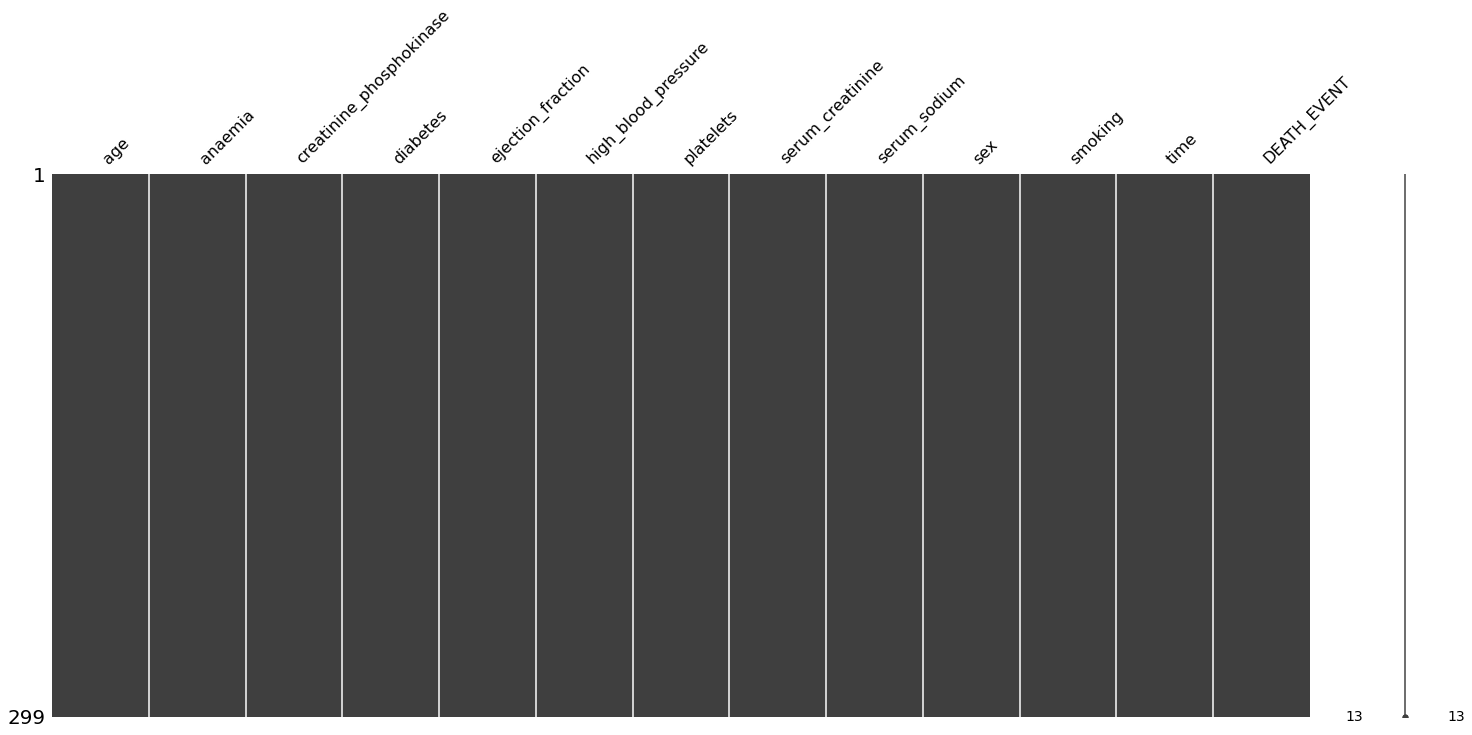

In [5]:
missingno.matrix(data)

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


数据特征：

1. age: 年龄
2. anaemia: 贫血 (0/1)
3. cp: 血液中cpk酶的水平
4. diabetes: 是否患糖尿病 (0/1)
5. ef: 心脏每次收缩，离开心脏的血液的百分比
6. hbp: 是否有高血压 (0/1)
7. platelets: 血小板
8. sc: 血清肌酐
9. ss: 血清钠
10. sex: 性别
11. smoking: 是否抽烟 (0/1)
12. time: 事件检查的时间？
13. DEATH： 患者是否在期间内死亡

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


数据可视化

分为两部分进行：
1. 非bool类型特征
2. bool类型特征

<AxesSubplot:xlabel='time', ylabel='Count'>

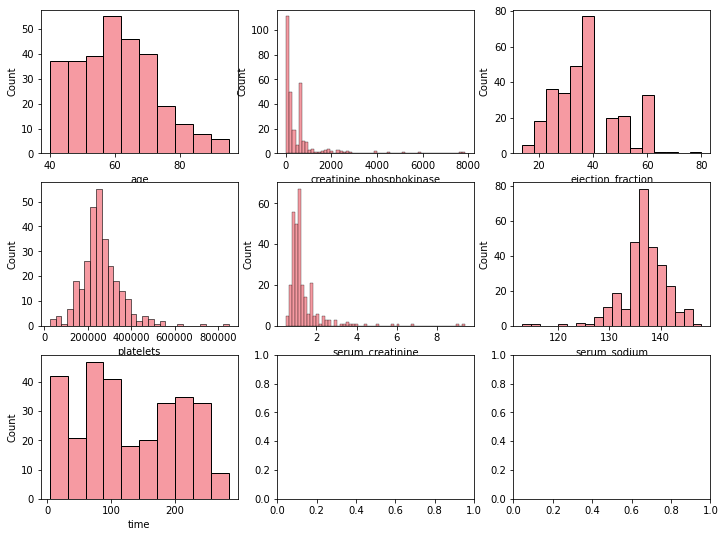

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(12, 9))
color = '#f47983'
sns.histplot(data['age'], color=color, ax=ax[0, 0])
sns.histplot(data['creatinine_phosphokinase'], color=color, ax=ax[0, 1])
sns.histplot(data['ejection_fraction'], color=color, ax=ax[0, 2])
sns.histplot(data['platelets'], color=color, ax=ax[1, 0])
sns.histplot(data['serum_creatinine'], color=color, ax=ax[1, 1])
sns.histplot(data['serum_sodium'], color=color, ax=ax[1, 2])
sns.histplot(data['time'], color=color, ax=ax[2, 0])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

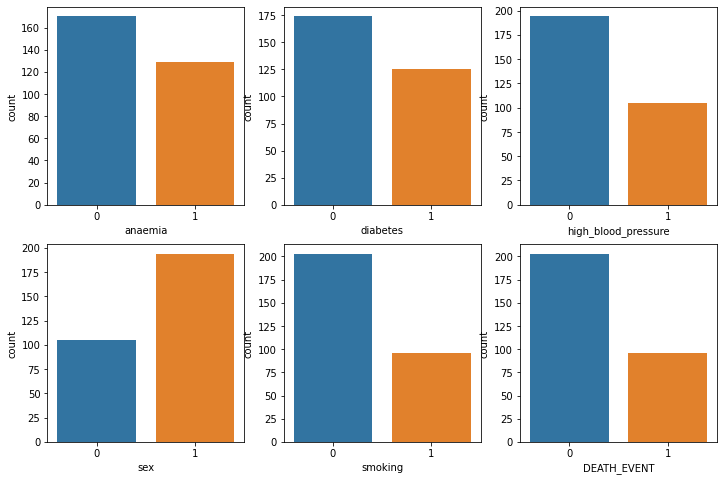

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
sns.countplot(data['anaemia'], ax=ax[0, 0])
sns.countplot(data['diabetes'], ax=ax[0, 1])
sns.countplot(data['high_blood_pressure'], ax=ax[0, 2])
sns.countplot(data['sex'], ax=ax[1, 0])
sns.countplot(data['smoking'], ax=ax[1, 1])
sns.countplot(data['DEATH_EVENT'], ax=ax[1, 2])

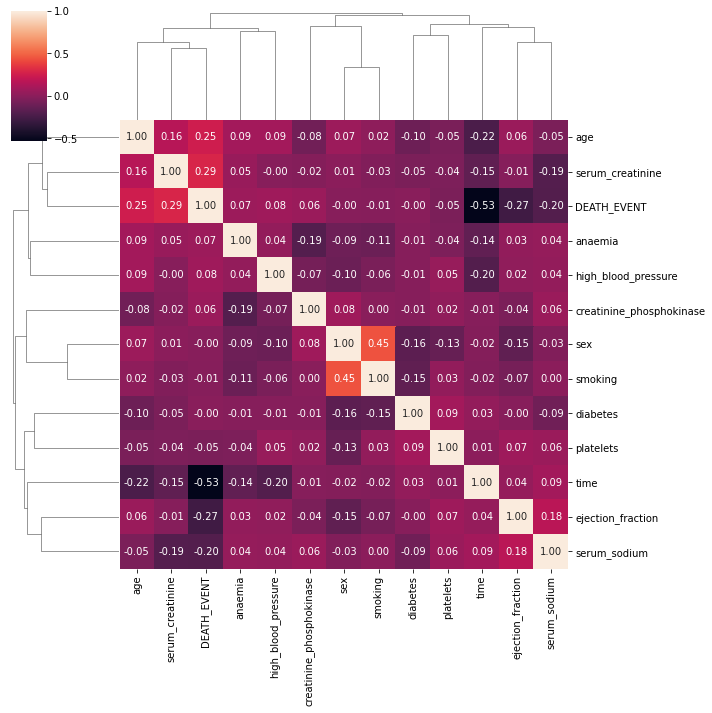

In [10]:
data_corr = data.corr()
sns.clustermap(data_corr, annot=True, fmt=".2f")

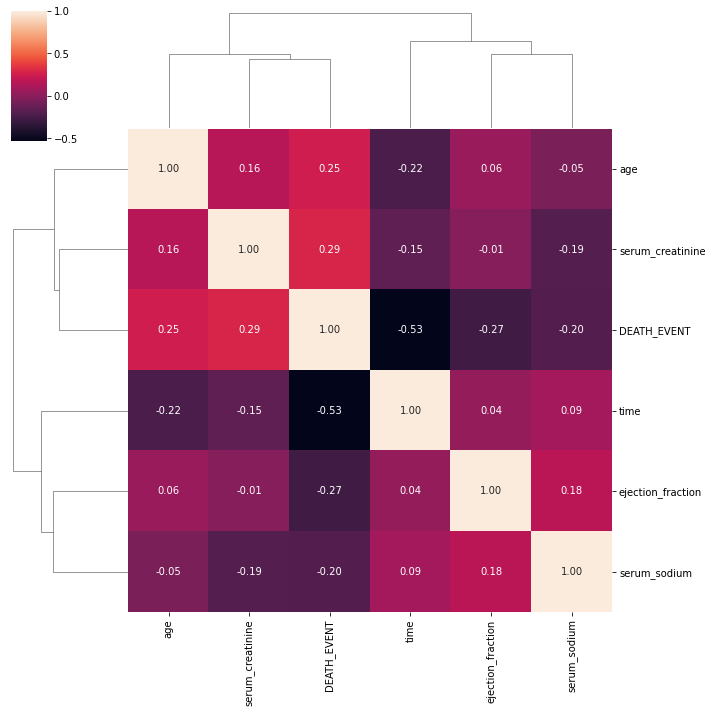

In [11]:
# 由于很多特征与是否死亡的关系不大，因此滤去这部分
eps = 0.15
filt = np.abs(data_corr['DEATH_EVENT']) > eps
corrFeatures = data_corr.columns[filt].tolist()
sns.clustermap(data[corrFeatures].corr(), annot=True, fmt=".2f")

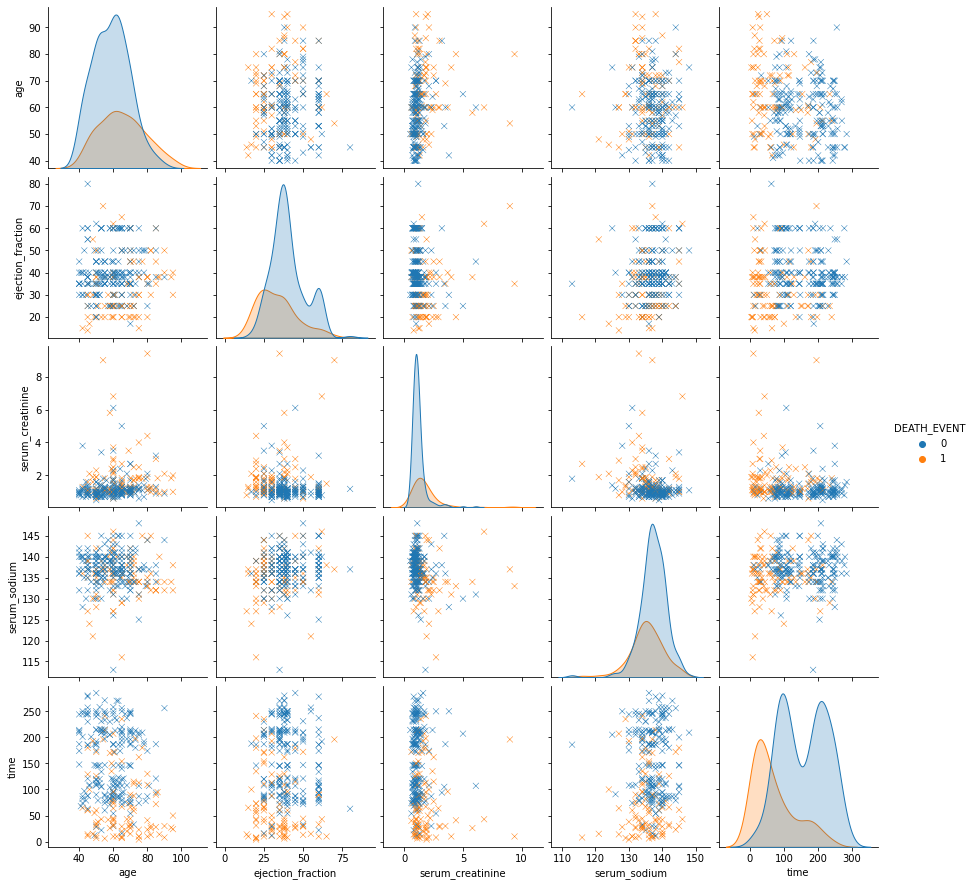

In [12]:
sns.pairplot(data[corrFeatures], diag_kind='kde',
             markers='x', hue='DEATH_EVENT')

检测并清除离群点

In [13]:
from collections import Counter


def detect(data, features):
    outlier = []

    for feature in features:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        IQR = Q3 - Q1
        outlier_bound = IQR * 1.5

        outlier_col = data[(data[feature] < Q1-outlier_bound) |
                           (data[feature] > Q3 + outlier_bound)].index
        outlier.extend(outlier_col)

    outlier = Counter(outlier)
    multi_outlier = list(i for i, v in outlier.items() if v > 1)

    return multi_outlier

In [14]:
data.loc[detect(data, ["age", "creatinine_phosphokinase", "ejection_fraction",
                "platelets", "serum_creatinine", "serum_sodium", "time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
data.drop(detect(data, ["age", "creatinine_phosphokinase", "ejection_fraction",
          "platelets", "serum_creatinine", "serum_sodium", "time"]), axis=0, inplace=True)
data.reset_index(drop=True)
data.shape

(289, 13)

将数据转换为正态分布

1. 先查看各特征的偏度
2. 如果偏度的绝对值大于1，则分别对该特征进行处理
3. 对于 OUT[11] 中的5个特征，也对其进行boxcox处理

In [16]:
skews = data.skew().sort_values(ascending=False)
skews

creatinine_phosphokinase    4.852619
serum_creatinine            4.629680
platelets                   1.437016
DEATH_EVENT                 0.801297
smoking                     0.733054
high_blood_pressure         0.587010
ejection_fraction           0.548999
age                         0.416002
diabetes                    0.360442
anaemia                     0.288134
time                        0.126097
sex                        -0.666976
serum_sodium               -0.859915
dtype: float64

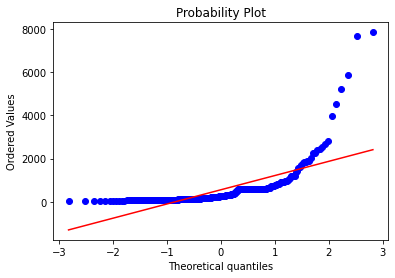

In [17]:
'''特征【1】：creatinine_phosphokinase'''

fig = plt.figure(figsize=(6, 4))
res = probplot(data['creatinine_phosphokinase'], plot=plt)
plt.show()

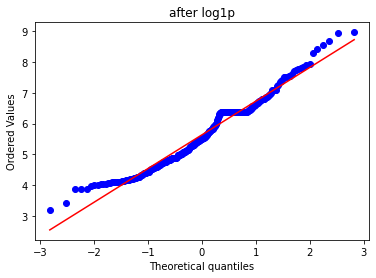

In [18]:
fig = plt.figure(figsize=(6, 4))
res = probplot(np.log1p(data['creatinine_phosphokinase']), plot=plt)
plt.title('after log1p')
plt.show()

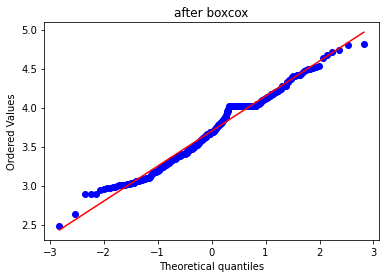

In [19]:
fig = plt.figure(figsize=(6, 4))
col_data, lam = boxcox(data['creatinine_phosphokinase'])
res = probplot(col_data, plot=plt)
plt.title('after boxcox')
plt.show()

In [20]:
data['creatinine_phosphokinase'], lam = boxcox(data['creatinine_phosphokinase'])
data['creatinine_phosphokinase'].skew()

0.03853189162180591

<AxesSubplot:xlabel='serum_creatinine', ylabel='Density'>

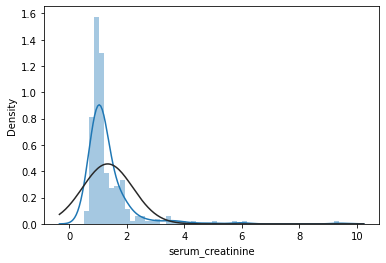

In [21]:
'''特征【2】：serum_creatinine'''

from scipy.stats import norm

fig = plt.figure(figsize=(6, 4))
sns.distplot(data['serum_creatinine'], fit=norm, kde=True)

Text(0.5, 1.0, 'after log1p')

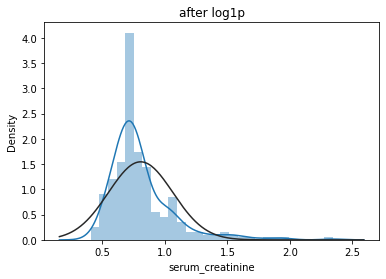

In [22]:
fig = plt.figure(figsize=(6, 4))
sns.distplot(np.log1p(data['serum_creatinine']), fit=norm, kde=True)
plt.title('after log1p')

Text(0.5, 1.0, 'after boxcox')

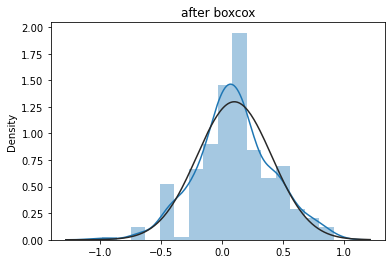

In [23]:
fig = plt.figure(figsize=(6, 4))
col_data, lam = boxcox(data['serum_creatinine'])
sns.distplot(col_data, kde=True, fit=norm)
plt.title('after boxcox')

In [24]:
data['serum_creatinine'], lam = boxcox(data['serum_creatinine'])
data['serum_creatinine'].skew()

-0.005122672601919765

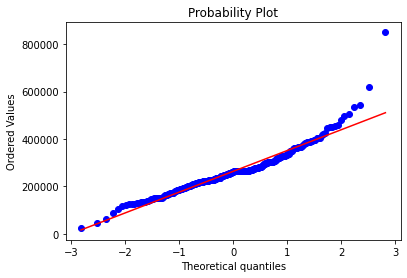

In [25]:
'''特征【3】：platelets'''

fig = plt.figure(figsize=(6, 4))
res = probplot(data['platelets'], plot=plt)
plt.show()

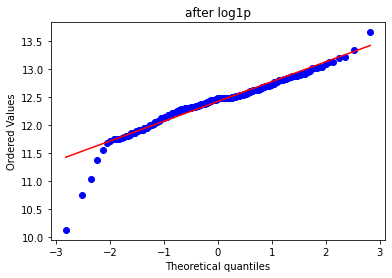

In [26]:
fig = plt.figure(figsize=(6, 4))
res = probplot(np.log1p(data['platelets']), plot=plt)
plt.title('after log1p')
plt.show()

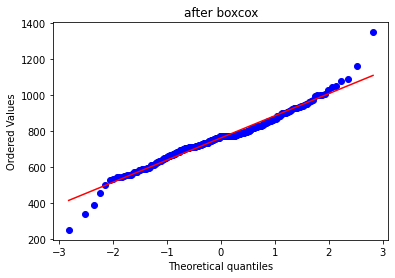

In [27]:
fig = plt.figure(figsize=(6, 4))
col_data, lam = boxcox(data['platelets'])
res = probplot(col_data, plot=plt)
plt.title('after boxcox')
plt.show()

In [28]:
data['platelets'], lam = boxcox(data['platelets'])
data['platelets'].skew()

0.15395466685875783

<AxesSubplot:xlabel='ejection_fraction', ylabel='Density'>

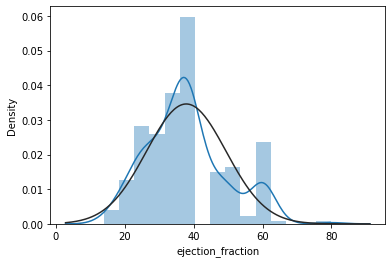

In [29]:
'''特征【4】：ejection_fraction'''

fig = plt.figure(figsize=(6, 4))
sns.distplot(data['ejection_fraction'], fit=norm, kde=True)

Text(0.5, 1.0, 'after log1p')

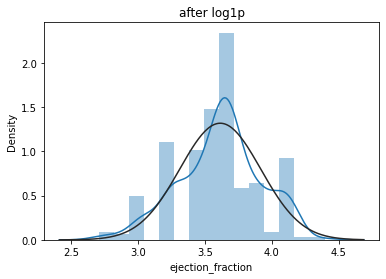

In [30]:
fig = plt.figure(figsize=(6, 4))
sns.distplot(np.log1p(data['ejection_fraction']), fit=norm, kde=True)
plt.title('after log1p')

Text(0.5, 1.0, 'after boxcox')

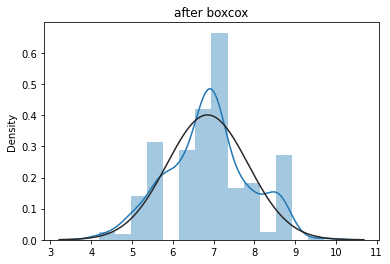

In [31]:
fig = plt.figure(figsize=(6, 4))
col_data, lam = boxcox(data['ejection_fraction'])
sns.distplot(col_data, kde=True, fit=norm)
plt.title('after boxcox')

In [32]:
data['ejection_fraction'], lam = boxcox(data['ejection_fraction'])
data['ejection_fraction'].skew()

-0.005705833225227031

<AxesSubplot:xlabel='serum_sodium', ylabel='Density'>

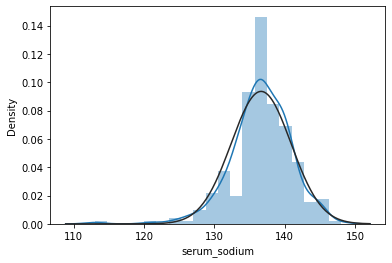

In [33]:
'''特征【5】：serum_sodium'''

fig = plt.figure(figsize=(6, 4))
sns.distplot(data['serum_sodium'], fit=norm, kde=True)

Text(0.5, 1.0, 'after log1p')

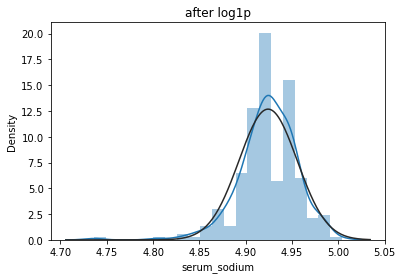

In [34]:
fig = plt.figure(figsize=(6, 4))
sns.distplot(np.log1p(data['serum_sodium']), fit=norm, kde=True)
plt.title('after log1p')

Text(0.5, 1.0, 'after boxcox')

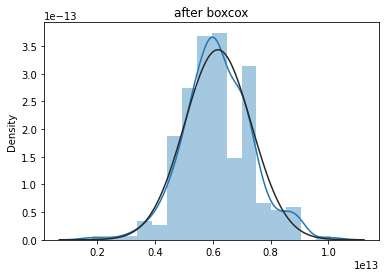

In [35]:
fig = plt.figure(figsize=(6, 4))
col_data, lam = boxcox(data['serum_sodium'])
sns.distplot(col_data, kde=True, fit=norm)
plt.title('after boxcox')

In [36]:
data['serum_sodium'], lam = boxcox(data['serum_sodium'])
data['serum_sodium'].skew()

0.06509085958252742

In [37]:
data.skew().sort_values(ascending=False)

DEATH_EVENT                 0.801297
smoking                     0.733054
high_blood_pressure         0.587010
age                         0.416002
diabetes                    0.360442
anaemia                     0.288134
platelets                   0.153955
time                        0.126097
serum_sodium                0.065091
creatinine_phosphokinase    0.038532
serum_creatinine           -0.005123
ejection_fraction          -0.005706
sex                        -0.666976
dtype: float64

Model

1. XGBOOST
2. 随机森林
3. 决策树
4. SVM

In [38]:
train = data.drop('DEATH_EVENT',axis=1)
y = data['DEATH_EVENT']

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

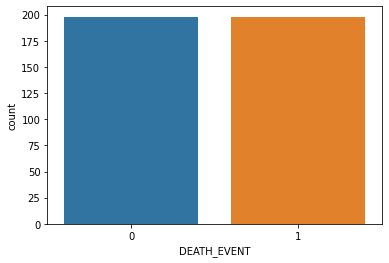

In [39]:
'''在上面数据可视化部分可以发现 类别不平衡，0远大于1'''

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=18)
smTrain, smY = sm.fit_resample(train, y)

sns.countplot(smY)

In [40]:
'''划分数据集'''

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(smTrain, smY, test_size=test_ratio, random_state=13)

print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (316, 12)
X_test shape : (80, 12)
y_train shape : (316,)
y_test shape : (80,)


In [41]:
'''模型【1】：XGBOOST'''

from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
model_accuracy = []


xgb_params = {'max_depth': range(1, 7)}
xgb = XGBClassifier()
clf = GridSearchCV(xgb, param_grid=xgb_params, cv=StratifiedKFold(n_splits=10), scoring="accuracy")
clf.fit(X_train, y_train)

pred_xgb = clf.predict(X_test)

mat_xgb = confusion_matrix(pred_xgb, y_test)
acc_xgb1 = accuracy_score(y_test, pred_xgb)

print(f"\nAccuracy : {acc_xgb1}\n")
print(f"confusion matrix :\n{mat_xgb}\n")
print(f"Best Params : {clf.best_estimator_}")

[15:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [42]:
X_train_xgb = X_train[['age', 'ejection_fraction',
                       'serum_creatinine', 'serum_sodium', 'time']]
X_test_xgb = X_test[['age', 'ejection_fraction',
                     'serum_creatinine', 'serum_sodium', 'time']]

xgb = XGBClassifier()
clf = GridSearchCV(xgb, param_grid=xgb_params, cv=StratifiedKFold(n_splits=10), scoring="accuracy")
clf.fit(X_train_xgb, y_train)

pred_xgb = clf.predict(X_test_xgb)

mat_xgb = confusion_matrix(pred_xgb, y_test)
acc_xgb2 = accuracy_score(y_test, pred_xgb)

print(f"\nAccuracy : {acc_xgb2}\n")
print(f"confusion matrix :\n{mat_xgb}\n")
print(f"Best Params : {clf.best_estimator_}")

model_accuracy.append(max(acc_xgb1, acc_xgb2))

[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:37:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:>

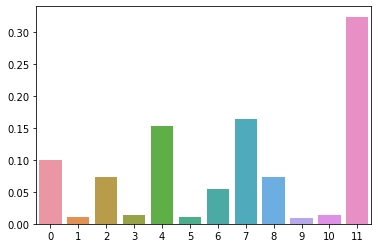

In [43]:
'''模型【2】：随机森林'''

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
importance = rfc.feature_importances_

sns.barplot([i for i in range(len(importance))], importance)

In [44]:
# 只保留importance高的特征
rfc_X_train = X_train[['age', 'creatinine_phosphokinase',
                       'ejection_fraction', 'serum_creatinine', 'time']]
rfc_X_test = X_test[['age', 'creatinine_phosphokinase',
                     'ejection_fraction', 'serum_creatinine', 'time']]

In [45]:
rfc_params = {'max_depth': range(5, 10)}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, param_grid=rfc_params, cv=StratifiedKFold(n_splits=10), scoring="accuracy")
clf.fit(X_train, y_train)

pred_rfc = clf.predict(X_test)

mat_rfc = confusion_matrix(pred_rfc, y_test)
acc_rfc = accuracy_score(y_test, pred_rfc)
model_accuracy.append(acc_rfc)

print(f"\nAccuracy : {acc_rfc}\n")
print(f"confusion matrix :\n{mat_rfc}\n")
print(f"Best Params : {clf.best_estimator_}")


Accuracy : 0.9125

confusion matrix :
[[43  2]
 [ 5 30]]

Best Params : RandomForestClassifier(max_depth=7)


<AxesSubplot:>

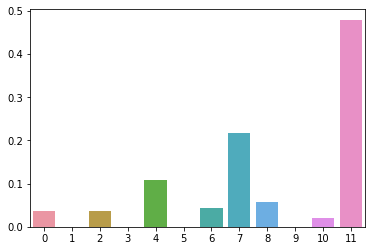

In [46]:
'''模型【3】：决策树'''

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
importance = dtree.feature_importances_

sns.barplot([i for i in range(len(importance))], importance)

In [47]:
dt_train = X_train[['age', 'creatinine_phosphokinase',
                    'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
dt_test = X_test[['age', 'creatinine_phosphokinase',
                  'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]

In [48]:
dt_params = {'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20)}
dtree = DecisionTreeClassifier()
clf = GridSearchCV(dtree, param_grid=dt_params, cv=StratifiedKFold(n_splits=10), scoring="accuracy")
clf.fit(dt_train, y_train)

pred_dt = clf.predict(dt_test)

mat_dt = confusion_matrix(pred_dt, y_test)
acc_dt = accuracy_score(y_test, pred_dt)

model_accuracy.append(acc_dt)

print(f"\nDTree Accuracy : {acc_dt}")
print(f"DTree confusion matrix :\n{mat_dt}\n")
print(f"Best Params : {clf.best_estimator_}")


DTree Accuracy : 0.775
DTree confusion matrix :
[[36  6]
 [12 26]]

Best Params : DecisionTreeClassifier(max_depth=5, min_samples_split=10)


<AxesSubplot:>

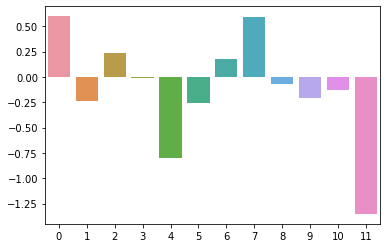

In [49]:
'''模型【4】：SVM'''

from sklearn.svm import SVC
from sklearn.preprocessing import scale

X_train_svm = scale(X_train)

svc = SVC(kernel="linear")
svc.fit(X_train_svm, y_train)
importance = svc.coef_[0]


sns.barplot([i for i in range(len(importance))], importance)

In [50]:
svm_train = scale(X_train[['age', 'ejection_fraction', 'serum_creatinine', 'time']])
svm_test = scale(X_test[['age', 'ejection_fraction', 'serum_creatinine', 'time']])

In [51]:
svm_params = {'kernel': ['linear', 'rbf'], 'C': np.linspace(0.1, 10, 20), 'gamma': np.linspace(0.1, 20, 20)}
svm = SVC()
clf = GridSearchCV(svm, param_grid=svm_params, cv=StratifiedKFold(n_splits=10), scoring="accuracy")
clf.fit(svm_train, y_train)

pred_svm = clf.predict(svm_test)

mat_svm = confusion_matrix(pred_svm, y_test)
acc_svm = accuracy_score(y_test, pred_svm)

model_accuracy.append(acc_svm)

print(f"\nSVM Accuracy : {acc_svm}")
print(f"SVM confusion matrix :\n{mat_svm}\n")
print(f"Best Params : {clf.best_estimator_}")


SVM Accuracy : 0.825
SVM confusion matrix :
[[36  2]
 [12 30]]

Best Params : SVC(C=0.6210526315789474, gamma=1.1473684210526316)


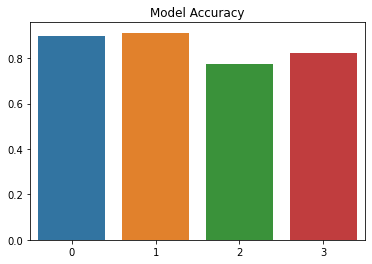

In [52]:
sns.barplot([i for i in range(len(model_accuracy))], model_accuracy)
plt.title("Model Accuracy")
plt.show()

In [53]:
res = pd.DataFrame({"Model": ['XGB', 'RFC', 'DTree', 'SVC'], "Accuracy": model_accuracy})
res

,Model,Accuracy
0,XGB,0.9000
1,RFC,0.9125
2,DTree,0.7750
3,SVC,0.8250
